<a href="https://colab.research.google.com/github/Phenix123/2D_Primitive/blob/master/faceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [3]:
import os
import cv2
import numpy as np
import tensorflow as tf
from keras.models import model_from_json
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
model = model_from_json(open("fer.json", "r").read())
model.load_weights('fer (2).h5') 
face_haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

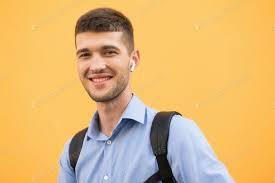

In [17]:
from PIL import Image
import glob
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('happy1.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)
#img = Image.open("happy1.jpg")
frame = np.float32(img)  

happy


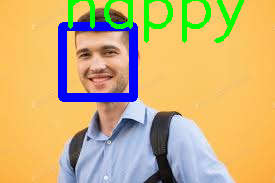

In [18]:
import numpy as np
from google.colab.patches import cv2_imshow

while True:          
    #Change the frame to greyscale  
    gray_image= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #We pass the image, scaleFactor and minneighbour
    
    gray_image = np.array(gray_image, dtype='uint8')
    faces_detected = face_haar_cascade.detectMultiScale(gray_image,1.31,5)
    #print (faces_detected)
    #Draw Triangles around the faces detected
    for (x,y,w,h) in faces_detected:
        cv2.rectangle(frame,(x,y), (x+w,y+h), (255,0,0), thickness=7)
        roi_gray=gray_image[y:y+w,x:x+h]
        roi_gray=cv2.resize(roi_gray,(48,48))
        
        #Processes the image and adjust it to pass it to the model
        image_pixels = tf.keras.preprocessing.image.img_to_array(roi_gray)
        #plt.imshow(image_pixels)
        #plt.show()
        image_pixels = np.expand_dims(image_pixels, axis = 0)
        image_pixels /= 255

        #Get the prediction of the model
        predictions = model.predict(image_pixels)
        #print(predictions)
        max_index = np.argmax(predictions[0])
        emotion_detection = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        emotion_prediction = emotion_detection[max_index]
        
        print(emotion_prediction)
        
        #Write on the frame the emotion detected
        cv2.putText(frame,emotion_prediction,(int(x), int(y)),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
    
    
    resize_image = cv2.resize(frame, (1000, 700))
    cv2_imshow(frame)
    break